In [1]:
import numpy as np
import pymc as pm
import aesara as ae
import arviz as az

print("Pymc", pm.__version__, ", Aesara", ae.__version__, ", Arviz", az.__version__)

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Pymc 4.0.0b6 , Aesara 2.5.1 , Arviz 0.12.1


In [2]:


X = np.random.normal(size=100)
y = np.random.normal(X) * 1.2

with pm.Model() as linear_model:
    weights = pm.Normal("weights", mu=0, sigma=1)
    noise = pm.Gamma("noise", alpha=2, beta=1)
    y_observed = pm.Normal(
        "y_observed",
        mu=X @ weights,
        sigma=noise,
        observed=y,
    )

    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)

/opt/conda/lib/python3.10/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.10/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just c

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [3]:
with linear_model:
    idata = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.10/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights, noise]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


In [4]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

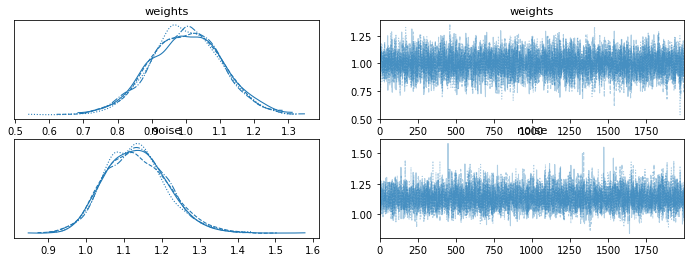

In [5]:
az.plot_trace(idata);

In [6]:
!pip list

Package                       Version
----------------------------- -----------
aeppl                         0.0.27
aesara                        2.5.1
alembic                       1.7.7
anyio                         3.6.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
asttokens                     2.0.5
async-generator               1.10
attrs                         21.4.0
Babel                         2.10.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.0
blinker                       1.4
brotlipy                      0.7.0
cachetools                    5.2.0
certifi                       2022.5.18.1
certipy                       0.1.3
cffi                          1.15.0
cftime                        1.6.0
charset-normalizer            2.0.12
cloudpickle                   2.1.0
colorama                      0.4.4
conda   